In [57]:
#importing Thomson data
import pandas as pd
import matplotlib.pyplot as plt
dfThomson = pd.read_csv('master.csv')
dfEikon = pd.read_csv('10_2_Aggregation2017.csv')

yearlist = [str(date)[:4] for date in dfEikon["PDFName"]]
dfEikon["Year"]=yearlist

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [58]:
lowercaseEikon=[]
lowercaseThomson=[]

for contri in dfThomson["contributor"]:
    lowercaseThomson.append(contri.lower())
    
for contri in dfEikon["Contributor"]:
    lowercaseEikon.append(contri.lower())

#appending lowercase Contributors to each dataframe
dfEikon["lowercaseContributors"]=lowercaseEikon
dfThomson["lowercaseContributors"]=lowercaseThomson
    
lowercaseEikon=set(lowercaseEikon)
lowercaseThomson=set(lowercaseThomson)

commonContributors=lowercaseEikon.intersection(lowercaseThomson)



print(commonContributors)

{'laurentian bank securities', 'warburg research gmbh', 'morgan stanley', 'national securities (us)', 'inteligo sab', 'analisis banco sabadell', 'jyske bank', 'imperial capital, llc', 'larrain vial s.a. corredora de bolsa', 'btig', 'crowell, weedon & co.', 'abn amro bank', 'desjardins securities', 'stephens inc.', 'albert fried & company llc', 'merriman capital, inc.', 'shinhan investment corp.', 'davy', 'paradigm capital', 'itau bba', 'scotiabank gbm', 'religare capital markets', 'dbs vickers', 't.h. capital research', 'everbright securities', 'investec bank (uk) plc', 'vtb capital', 'td securities', 'kb investment & securities', 'phu hung securities', 'bb&t capital markets', 'loewen, ondaatje, mccutcheon limited', 'collins stewart europe', 'caris & company', 'lifetech capital', 'susquehanna financial group lllp', 'cabrera capital markets', 'iifl', 'meritz securities', 'i.b.i.', 'early bird capital', 'swedbank markets', 'mkm partners', 'capstone investments', 'stonecap securities inc.

In [71]:
#creating number of downloaded reports per year for contributors from each dataset in both of them
yearList=dfEikon["Year"].unique()
yearList=sorted(yearList)
totalReports=[]

for year in yearList:
    print(year)
    counter=0
    for ind in dfEikon.index:
        if dfEikon["Year"][ind]==year:
            if dfEikon["lowercaseContributors"][ind] in commonContributors:
                if dfEikon["isDownloaded"][ind]==1:
                    counter+=1
    totalReports.append(counter)

print(totalReports)

2012
2013
2014
2015
2016
2017
2021
nan
[48624, 49833, 56889, 59092, 62610, 59987, 0, 0]


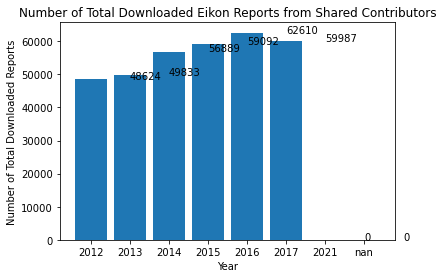

In [73]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])

plt.bar(yearList,totalReports)
plt.title('Number of Total Downloaded Eikon Reports from Shared Contributors')
plt.xlabel('Year')
plt.ylabel('Number of Total Downloaded Reports')
add_value_label(yearList,totalReports)
plt.show()

In [74]:
#shared contributors for thomson

yearList=dfThomson["year"].unique()
yearList=sorted(yearList)
totalReports=[]

for year in yearList:
    print(year)
    counter=0
    for ind in dfThomson.index:
        if dfThomson["year"][ind]==year:
            if dfThomson["lowercaseContributors"][ind] in commonContributors:
                counter+=1
    totalReports.append(counter)

print(totalReports)

1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
[0, 13, 12, 19, 68, 143, 579, 867, 803, 852, 1354, 1445, 2445, 2848, 2454, 3430, 5264, 8855, 9499, 8225, 8168, 11826, 18832, 21048, 23597, 30558, 34031, 29717, 40316, 51532]


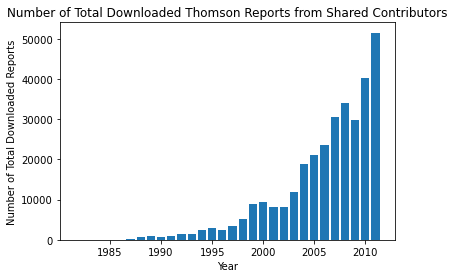

In [75]:
plt.bar(yearList,totalReports)
plt.title('Number of Total Downloaded Thomson Reports from Shared Contributors')
plt.xlabel('Year')
plt.ylabel('Number of Total Downloaded Reports')
#add_value_label(yearList,totalReports)
plt.show()

In [ ]:
##finished below with graphs below

In [22]:
EikonContributors= pd.DataFrame(dfEikon["Contributor"]).value_counts()
ThomsonContributors= pd.DataFrame(dfThomson["contributor"]).value_counts()

EikonContributors.to_excel("EikonUniqueContributors.xlsx",sheet_name="Eikon")
ThomsonContributors.to_excel("ThomsonUniqueContributors.xlsx",sheet_name="Thomson")

In [38]:
print(EikonContributors.index.values)

[('JPMorgan',) ('RBC Capital Markets',) ('Barclays',)
 ('Wells Fargo Securities, LLC',) ('Credit Suisse',)
 ('BofA Global Research',) ('UBS Equities',) ('Deutsche Bank',)
 ('Morgan Stanley',) ('Jefferies',) ('Cowen and Company',)
 ('KeyBanc Capital Markets Inc.',) ('Piper Sandler Companies',)
 ('Truist Securities',) ('EVERCORE ISI',) ('William Blair & Company',)
 ('Stephens Inc.',) ("Sandler O'Neill & Partners",)
 ('Susquehanna Financial Group LLLP',) ('Oppenheimer & Co., Inc.',)
 ('BMO Capital Markets',) ('Macquarie Research',) ('SterneAgee CRT',)
 ('Guggenheim Securities LLC',) ('Wedbush Securities Inc.',)
 ('Seaport Global Securities LLC',) ('Canaccord Genuity',)
 ('D.A. Davidson & Company',) ('The Buckingham Research Group',)
 ('JMP Securities',) ('Janney Montgomery Scott LLC',) ('SVB Leerink',)
 ('Avondale Partners, LLC',) ('BB&T Capital Markets',)
 ('Brean Capital, LLC',) ('Wunderlich Securities',) ('MKM Partners',)
 ('Roth Capital Partners, Inc.',) ('BMO Capital Markets U.S',)
 

In [34]:
Eikon=EikonContributors.to_frame()
Thomson=ThomsonContributors.to_frame()
EikonNames=list(Eikon.index.values)
ThomsonNames=list(Thomson.index.values)

In [35]:
print(EikonNames)

[('JPMorgan',), ('RBC Capital Markets',), ('Barclays',), ('Wells Fargo Securities, LLC',), ('Credit Suisse',), ('BofA Global Research',), ('UBS Equities',), ('Deutsche Bank',), ('Morgan Stanley',), ('Jefferies',), ('Cowen and Company',), ('KeyBanc Capital Markets Inc.',), ('Piper Sandler Companies',), ('Truist Securities',), ('EVERCORE ISI',), ('William Blair & Company',), ('Stephens Inc.',), ("Sandler O'Neill & Partners",), ('Susquehanna Financial Group LLLP',), ('Oppenheimer & Co., Inc.',), ('BMO Capital Markets',), ('Macquarie Research',), ('SterneAgee CRT',), ('Guggenheim Securities LLC',), ('Wedbush Securities Inc.',), ('Seaport Global Securities LLC',), ('Canaccord Genuity',), ('D.A. Davidson & Company',), ('The Buckingham Research Group',), ('JMP Securities',), ('Janney Montgomery Scott LLC',), ('SVB Leerink',), ('Avondale Partners, LLC',), ('BB&T Capital Markets',), ('Brean Capital, LLC',), ('Wunderlich Securities',), ('MKM Partners',), ('Roth Capital Partners, Inc.',), ('BMO C

In [19]:
print(EikonContributors)

<class 'pandas.core.series.Series'>


In [18]:
print(ThomsonContributors)

contributor                                    
CORPORATE TECHNOLOGY INFORMATION SERVICES, INC.    152744
PRICETARGET RESEARCH, INC.                         127737
THOMSON STREETEVENTS                               111784
MERGENT, INC. - COMPANY REPORT                      94955
SMITH BARNEY CITIGROUP (MORNING MEETING NOTES)      94279
                                                    ...  
STOCKBROKERS MALAWI - AUERBACH GRAYSON                  1
EFG ISTANBUL                                            1
MUZINICH & COMPANY                                      1
HYPO VEREINSBANK                                        1
KDB DAEWOO SECURITIES                                   1
Length: 928, dtype: int64


In [7]:
EikonContributors=set(dfEikon["Contributor"])
print(EikonContributors)

{'RongViet Securities', 'Jacob Securities', 'Faida Investment Bank Ltd', 'Griffin Securities, Inc.', 'Stephens Inc.', 'Lodge Partners', 'Janco Partners, Inc.', 'SAFRA Research', 'China Galaxy Securities Co., Ltd', 'Gilford Securities', 'MUFG Securities Americas Inc.', 'Bloom Burton & Co.', 'Sidoti & Company', 'Guotai JunAn (HK) Retail Rsch', 'BCS', 'BPI Capital Africa', 'Huatai Financial Holdings (HK)', 'CMB International Global Markets Limited', 'M Partners', 'Euroland Corporate', 'KT ZMICO Securities Company Ltd.', 'Allaria Ledesma y Cia SA', 'C.K. Cooper & Company', 'Motilal Oswal Securities Ltd.', 'Hanyang Securities', 'Intermoney Valores', 'Mirae Asset Securities', 'Banca Transilvania', 'Dominick & Dominick LLC', 'LifeSci Capital', 'RBC Capital Markets', 'Credit Suisse Fixed Income', 'FBN Securities', 'Gordon Haskett', 'Laurentian Bank Securities', 'FBN Capital Ltd.', 'MLV & Co.', 'Paradigm Capital', 'New Albion Partners', 'Erste Group', 'GVC Capital LLC', 'Nirmal Bang Institution

In [9]:
ThomsonContributors=set(dfThomson["contributor"])
print(ThomsonContributors)

{'I.B.I. (ISRAEL)', 'BEACON ROCK RESEARCH', 'GRUPO BURSATIL MEXICANO, S.A. DE C.V.', 'DAWSON JAMES', 'MUZINICH & COMPANY', 'MANAGESOURCE RESEARCH INC', 'NATIONAL BANK FINANCIAL', 'MORGAN JOSEPH AND CO', 'FARMHOUSE EQUITY RESEARCH', 'NATIXIS', 'VICKERS BALLAS INVESTMENT RESEARCH', 'SECURITIES CORPORATION OF IOWA', 'J.J.B. HILLIARD, W.L. LYONS, INC.', 'WR HAMBRECHT +CO. (HISTORICAL)', 'HYUNDAI SECURITIES CO., LTD.', 'KAUFMAN BROTHERS', 'FIRSTCALL INDIA EQUITY ADVISORS PVT LTD', 'PARIBAS CAPITAL MARKETS GROUP', 'PERSHING DIV., DONALDSON LUFKIN & JENRETTE', 'DISCLOSURE INSIGHT', 'PRICETARGET RESEARCH, INC.', 'BNP/PARIBAS', 'ANDERSON CAPITAL MANAGEMENT', 'RELIGARE CAPITAL MARKETS', 'NATIXIS BLEICHROEDER', 'JM DUTTON & ASSOCIATES, LLC', 'DANSKE EQUITIES (ESN)', 'ADVENT CAPITAL AND FINANCE CORPORATION', 'SCOTIABANK GBM', 'THINKEQUITY PARTNERS', 'TM CAPITAL CORP.', 'THE COLUMBIA GROUP, LLC', 'MACQUARIE EQUITIES LIMITED', 'ROBERT FLEMING, INC.', 'URALSIB FINANCIAL CORPORATION - AUERBACH GRAYSON

In [4]:
print(dfEikon["Contributor"])

0               William Blair & Company
1          KeyBanc Capital Markets Inc.
2                                  BTIG
3                        Morgan Stanley
4                             Jefferies
                       ...             
1015842                        Barclays
1015843                    UBS Equities
1015844     Wells Fargo Securities, LLC
1015845         Wedbush Securities Inc.
1015846               Truist Securities
Name: Contributor, Length: 1015847, dtype: object


In [5]:
print(dfThomson["contributor"])

0                           PIPER JAFFRAY
1                           PIPER JAFFRAY
2                           PIPER JAFFRAY
3                           PIPER JAFFRAY
4                        PAINEWEBBER INC.
                        ...              
2473564    MERGENT, INC. - COMPANY REPORT
2473565    MERGENT, INC. - COMPANY REPORT
2473566      MERGENT FIS - HISTORY & DEBT
2473567    MERGENT, INC. - COMPANY REPORT
2473568    MERGENT, INC. - COMPANY REPORT
Name: contributor, Length: 2473569, dtype: object


In [4]:
dfThomson.count()

key            2473569
reportid       2473569
ticker         2473288
cusip          2473569
title          2473569
ratings        2473569
year           2473569
month          2473569
day            2473569
contributor    2473569
analyst        2473566
investext      2473569
collection     2473569
dtype: int64

In [5]:
#creating number of downloaded reports per year
yearList=dfThomson["year"].unique()
yearList=sorted(yearList)
totalReports=[]

for year in yearList:
    print(year)
    counter=0
    for ind in dfThomson.index:
        if dfThomson["year"][ind]==year:
            counter+=1
    totalReports.append(counter)

print(totalReports)

1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
[36, 1185, 2984, 2763, 4178, 5141, 6691, 8952, 7654, 8655, 10226, 10300, 15287, 18195, 19399, 54829, 74811, 103208, 115895, 118416, 125165, 136361, 164389, 200284, 203540, 212466, 210778, 233112, 203594, 195075]


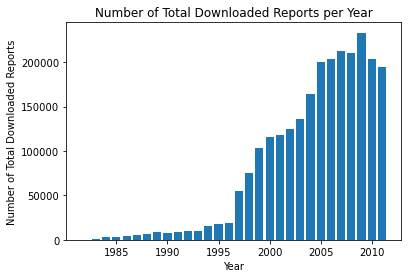

In [10]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])

plt.bar(yearList,totalReports)
plt.title('Number of Total Downloaded Reports per Year')
plt.xlabel('Year')
plt.ylabel('Number of Total Downloaded Reports')
#add_value_label(yearList,totalReports)
plt.show()

In [11]:
print(yearList)

[1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]


In [76]:
i=0
while i<len(yearList):
    print(str(yearList[i])+" : " +str(totalReports[i]))
    i+=1

1982 : 0
1983 : 13
1984 : 12
1985 : 19
1986 : 68
1987 : 143
1988 : 579
1989 : 867
1990 : 803
1991 : 852
1992 : 1354
1993 : 1445
1994 : 2445
1995 : 2848
1996 : 2454
1997 : 3430
1998 : 5264
1999 : 8855
2000 : 9499
2001 : 8225
2002 : 8168
2003 : 11826
2004 : 18832
2005 : 21048
2006 : 23597
2007 : 30558
2008 : 34031
2009 : 29717
2010 : 40316
2011 : 51532
